In [1]:
#Bank Marketing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [3]:
#To load the dataset
df=pd.read_csv("bank.csv")
#To reterive the first five rows of data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [4]:
#To check the how many rows ans columns are there in dataset
df.shape

(11162, 17)

In [5]:
#to check all columns
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'deposit'],
      dtype=object)

Apply the Cleaning process

In [6]:
#Step 1: To check the null values 
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

There is no null values in Bank dataset

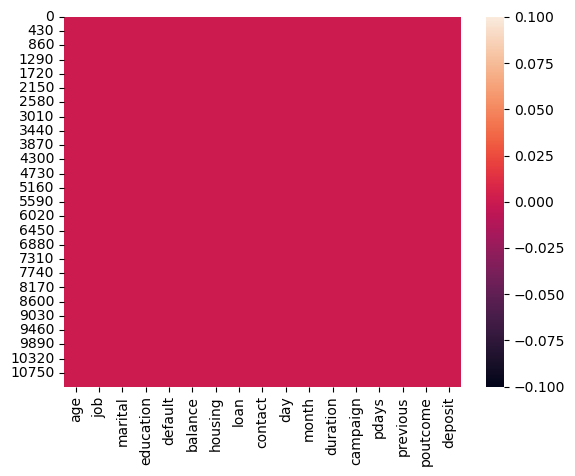

In [7]:
# Visulize the null values
sns.heatmap(df.isnull())
plt.show()

In [8]:
#Step 4: To check the datatypes
df.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
deposit      int64
dtype: object

In [9]:
#Step 5: To check the duplicates values in dataset
df.duplicated().sum()

0

There is no duplicates values in bank dataset

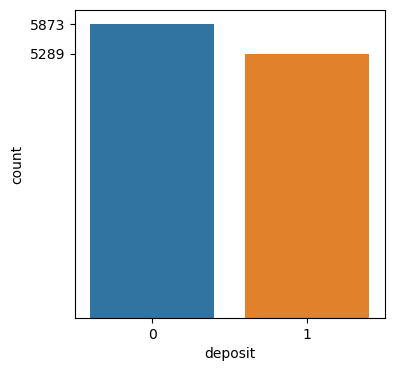

deposit
0    5873
1    5289
Name: count, dtype: int64


In [10]:
#Data visulization 
#How many samples of 1's and 0's in output column
#Deposit Means People Recommed to Subscribe/Open The A/c
#1 Means:-True/Yes People said To Subscribe
#0 Means:-False/No People Said Not To Subscribe
plt.figure(figsize=(4,4))
f=df["deposit"].value_counts()
sns.countplot(data=df,x='deposit')
plt.yticks(f)
plt.show()
print(f)

In [11]:
#Sperate the input and output from given dataframe df
X=df.drop('deposit',axis=1) #input 2D
Y=df["deposit"] #output 1D

In [12]:
X.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3


In [13]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: deposit, dtype: int64

In [14]:
#to check the shape of DataFarame 
X.shape,Y.shape

((11162, 16), (11162,))

In [15]:
#Train_Test_Split : 70% and 30%
from sklearn.model_selection import train_test_split


In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [17]:
X_train.shape,Y_train.shape #to check the rows and columns

((7813, 16), (7813,))

In [18]:
X_test.shape,Y_test.shape #to check the rows and columns

((3349, 16), (3349,))

In [19]:
#StandardScaler
#Apply Scaling on Input Column Of Both X_train and X_test
#use StandardScaler Class
from sklearn.preprocessing import StandardScaler
#Create the object of StandardSacaler
ss=StandardScaler()

In [20]:
#Apply the StandardScaler on training data
X_train=ss.fit_transform(X_train) #Training Input
X_test=ss.transform(X_test)

In [21]:
X_train

array([[ 2.76552511,  0.15596991, -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872],
       [ 1.16824122, -1.0830671 , -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872],
       [ 1.33637636,  1.39500692, -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872],
       ...,
       [-1.18565083, -0.77330785, -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872],
       [-0.00870481, -1.39282635,  1.27358436, ...,  3.07264515,
         4.3350541 , -0.47109973],
       [-0.42904267, -1.0830671 , -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872]])

In [22]:
X_test

array([[-0.84938054, -1.39282635,  1.27358436, ..., -0.48203214,
        -0.35894691,  0.52287872],
       [ 0.15943034, -1.0830671 , -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872],
       [-1.26971841, -1.0830671 ,  1.27358436, ..., -0.48203214,
        -0.35894691,  0.52287872],
       ...,
       [-0.51311025, -0.15378934, -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872],
       [ 0.49570063,  0.15596991,  1.27358436, ..., -0.48203214,
        -0.35894691,  0.52287872],
       [ 0.07536277, -0.15378934, -1.92028969, ..., -0.48203214,
        -0.35894691,  0.52287872]])

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [24]:
#create user define funtion
def create_model(model):
    model.fit(X_train,Y_train) #Train the model with 70% data
    #Test the model with 30%
    Y_pred=model.predict(X_test)
    #print confusion matrix
    print(confusion_matrix(Y_test,Y_pred))
    #Generate classification report
    print(classification_report(Y_test,Y_pred))
    return model

perform the model
1).LogisticRegression 

In [25]:
#call Logisitic Regression inbuilt class
from sklearn.linear_model import LogisticRegression
#create the object of LogisticRegression class
lor=LogisticRegression()

In [26]:
#call user defined funtion
lr=create_model(lor)

[[1441  319]
 [ 359 1230]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



In [27]:
#Here recall score is important in this dataset 
#And recall score is 0.77 and Accurancy is 0.80 means 80%
#Logistic regression 


2) DecisionTreeClassifier


In [28]:
#Call decisionTreeClassifier inbuilt class
from sklearn.tree import DecisionTreeClassifier

In [29]:
#create the object of DecisionTreeClassifier class
dtc=DecisionTreeClassifier(random_state=1)
#By default use method gini index

In [30]:
#call user defined funtion 
dtc=create_model(dtc)

[[1407  353]
 [ 372 1217]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1760
           1       0.78      0.77      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



In [31]:
# In the above report 
# recall score is 0.77 means 77% and Accuracy is 0.78 means 78%

Puruning Technique Of DecsionTreeClassifier

In [32]:
#max depth: inbuilt parameter of DecisionTreeClassifier
#value of max_depth parameter for any dataset <=8
#create the object of DecisionTreeClassifier and passing the prameter 
#of max_depth 
'''for i in range(1,9): #start=1 stop=9 step=+1
    dtc=DecisionTreeClassifier(random_state=1,max_depth=i)
    #i=1 then i=2 etc 
    #by default use method gini index
    print("\nMax_depth:",i)
    #call user defined function
    dtc=create_model(dtc)'''
#create the object of DecisionTreeClassifier class and 
#passing the parameter max_depth=5
dtc=DecisionTreeClassifier(random_state=1,max_depth=5)
#by default use gini index method
#call user defined funtion
dtc=create_model(dtc)




[[1316  444]
 [ 228 1361]]
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1760
           1       0.75      0.86      0.80      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.81      0.80      0.80      3349



In [33]:
#create the dataframe with the help of dictionary
dict={"input columns":X.columns,"IG":dtc.feature_importances_}
#IG means information gain of each input
df1=pd.DataFrame(dict)
df1.sort_values(by="IG",ascending=False,ignore_index=True)

,input columns,IG
0,duration,0.576413
1,contact,0.119728
2,housing,0.066337
3,month,0.052438
4,poutcome,0.051127
5,pdays,0.050013
6,previous,0.044950
7,age,0.026846
8,loan,0.003762
9,day,0.003512


In the above report of DecisionTreeClassifier using max_depth
recall score is 0.86 means 86% and Accuracy=0.80 means 80%

2) min_sample_leaf: Pruning technique

In [34]:
#min_sample_leaf : Second pruning technique 
#min_sample_leaf>=45 and <=100 in any dataset of Classification 
'''for i in range(45,101): #i=45 i<=100 i=i+1
    #create the object of DecisionTreeClassifier class and 
    #passing the parameter min_sample_leaf 
    #by default takes Gini index
    dtc=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print("\nMin_sample_leaf:",i)
    #call user defined function
    dtc=create_model(dtc)'''
#create object of DecisionTreeClassifier class and 
#passing the parameter min_sample_leaf= 45
dtc=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)
#by default use gini index method
#call user defined funtion
dtc=create_model(dtc)

[[1379  381]
 [ 204 1385]]
              precision    recall  f1-score   support

           0       0.87      0.78      0.83      1760
           1       0.78      0.87      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



In [35]:
#create the dataframe with the help of dictionary
dict={"input columns":X.columns,"IG":dtc.feature_importances_}
#IG means information gain of each input
df1=pd.DataFrame(dict)
df1.sort_values(by="IG",ascending=False,ignore_index=True)

,input columns,IG
0,duration,0.496317
1,month,0.109126
2,contact,0.105357
3,housing,0.068329
4,poutcome,0.059375
5,pdays,0.044066
6,age,0.043918
7,previous,0.036294
8,balance,0.021749
9,day,0.005046


In the above report of DecisionTreeClassifier using min_sample_leaf parameter
recall score is 0.87 means 87% and Accurancy=0.83 means 83%

#Entropy

In [36]:
#create the object of DecisionTreeClassifier class
#criterion=Entropy
dtc=DecisionTreeClassifier(random_state=1,criterion="entropy")
#By default use method gini index

In [37]:
#call user defined funtion 
dtc=create_model(dtc)

[[1433  327]
 [ 394 1195]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1760
           1       0.79      0.75      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



In [38]:
#create the dataframe using dictionary 
dict={"Input columns":X.columns,"IG":dtc.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values(by='IG',ascending=False,ignore_index=True)


,Input columns,IG
0,duration,0.311218
1,month,0.110721
2,balance,0.094507
3,day,0.090688
4,age,0.086951
5,contact,0.076067
6,pdays,0.046928
7,housing,0.032042
8,job,0.028838
9,campaign,0.027159


In [39]:
#

In [40]:
#max_depth: inbuilt parameter of DecisionTreeClassifier class
#criterion=Entropy
#create the object of DecisionTreeClassifier class and passing the parameter max_depth
'''for i in range(1,9): #start=1 stop=9 step=+1
    dtc=DecisionTreeClassifier(random_state=1,criterion="entropy",max_depth=i)
    #i=1 then i=2 etc
    print("\nMax_depth:",i)
    #call user defined funtion
    dtc=create_model(dtc)'''
#create the object of DecisionTreeCalssifier class and passing the parameter max_depth
#criterion=Entropy
dtc=DecisionTreeClassifier(random_state=1,criterion="entropy",max_depth=6)
#call user defined funtion
dtc=create_model(dtc)


[[1364  396]
 [ 298 1291]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1760
           1       0.77      0.81      0.79      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349



In [41]:
#create the dataframe using dictionary 
dict={"Input columns":X.columns,"IG":dtc.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values(by='IG',ascending=False,ignore_index=True)


,Input columns,IG
0,duration,0.555667
1,contact,0.164393
2,month,0.068525
3,housing,0.065387
4,pdays,0.058998
5,poutcome,0.029351
6,age,0.027552
7,previous,0.015447
8,day,0.006827
9,loan,0.004597


In the above report of DecisionTreeClassifier using max_depth parameter and 
criterion=Entropy
recall score is 0.81 means 81% and Accuracy=0.79 means 79%

min_sample_leaf:

In [42]:
#min_sample_leaf: inbuilt parameter of DecisionTreeClassfier class
#criterion=entropy
#create the object of DecisionTreeClassifier and 
#passing the parameter min_sample_leaf
'''for i in range(45,101):
    dtc=DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=i)
    #i=1 then i=2 etc
    print("\nMin_samples_leaf",i)
    #call user defined funtion
    dtc=create_model(dtc)'''
#create the object of DecisionTreeclassifier and passing the parameter of min_leaf_samples
#criterion=entropy
dtc=DecisionTreeClassifier(random_state=1,criterion="entropy",min_samples_leaf=80)
#call the user defined funtion
dtc=create_model(dtc)

[[1395  365]
 [ 257 1332]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1760
           1       0.78      0.84      0.81      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.82      0.81      3349
weighted avg       0.82      0.81      0.81      3349



In [43]:
#create the Dataframe using dictionary
dict={"Input columns":X.columns,"IG":dtc.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values(by="IG",ascending=False,ignore_index=True)

,Input columns,IG
0,duration,0.539598
1,contact,0.153794
2,month,0.065982
3,housing,0.063696
4,pdays,0.049918
5,balance,0.035014
6,age,0.025494
7,poutcome,0.025088
8,previous,0.015017
9,campaign,0.012796


In the above report of DecisionTreeClassifier using Min_samples_leaf
parameter 
recall score is 0.84 means 84% and Accuracy=0.81 means 81% 

Ensembling Technique

In [44]:
#Apply the Ensembling Technique
#RandomForestTree(use Bagging):-
from sklearn.ensemble import RandomForestClassifier


In [45]:
#RandomForestClassifier inbuilt inner class
#NO of Decisiontree>=10 and <=100
#No. of Decisiontrees : use inbuit parameter n_estimators
'''for i in range(10,101): 
    #create the object of RandomForestClassifier class
    rfc=RandomForestClassifier(n_estimators=i,random_state=1)
    print("NO of Estimators :",i)
    #call funtion
    rfc=create_model(rfc)'''
#Create the object of RandomForestClassifier class
rfc=RandomForestClassifier(n_estimators=63,random_state=1)
#call user defined funtion
rfc=create_model(rfc)

[[1435  325]
 [ 195 1394]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1760
           1       0.81      0.88      0.84      1589

    accuracy                           0.84      3349
   macro avg       0.85      0.85      0.84      3349
weighted avg       0.85      0.84      0.84      3349



In [46]:
#create the dataframe with help of dictionary
dict={'Input columns':X.columns,"IG":rfc.feature_importances_}
#IG means information gain of each input
df1=pd.DataFrame(dict)
df1.sort_values(by="IG",ascending=False,ignore_index=True)

,Input columns,IG
0,duration,0.361383
1,balance,0.088449
2,age,0.087264
3,month,0.083603
4,day,0.071345
5,pdays,0.051342
6,job,0.039858
7,contact,0.039476
8,poutcome,0.038065
9,housing,0.033426


In the above report of RandomForestTree Classifier 
recall score is 0.88 means 88% and Accuracy is 0.84 means 84%

AdaBoostClassifier

In [47]:
#Apply next Ensembling Technique 
#AdaBoostClassifier(boosting method)
from sklearn.ensemble import AdaBoostClassifier

In [48]:
'''for i in range (1,17):
    #create the object of AdaBoostClassifier and passing the value 
    #n_estimators=i
    ada=AdaBoostClassifier(n_estimators=i,random_state=1)
    print("NO of Estimators:",i)
    #Call the user defined funtion
    ada=create_model(ada)'''
#Create the object of AdaBoostClassifier passing the value n_estimators=3
ada=AdaBoostClassifier(n_estimators=3,random_state=1)
#call user defined funtion 
ada=create_model(ada)

[[1262  498]
 [ 310 1279]]
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1760
           1       0.72      0.80      0.76      1589

    accuracy                           0.76      3349
   macro avg       0.76      0.76      0.76      3349
weighted avg       0.76      0.76      0.76      3349



In [49]:
#Create the dataframe with help of dictionary
dict={"input columns":X.columns,"IG":ada.feature_importances_}
#IG means information gain of each input
df1=pd.DataFrame(dict)
df1.sort_values(by='IG',ascending=False,ignore_index=True)

,input columns,IG
0,duration,0.666667
1,contact,0.333333
2,age,0.000000
3,job,0.000000
4,marital,0.000000
5,education,0.000000
6,default,0.000000
7,balance,0.000000
8,housing,0.000000
9,loan,0.000000


In the above report of AdaBoostClassifier 
recall score is 0.80 means 80% and Accurancy=0.76 means 76%

Gradient Boosting(GB)

In [50]:
#Gradient Boosting
#inbuilt class GradientBoostingClassifier(Boosting method)
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
#GradientBoostClassifier(boosting method)
#Focus on shortcomingerror
'''for i in range(10,101):
    #create the object GradientBoostingClassifier passing the value
    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)
    print("No of Estimators:",i)
    #Call the user defiend funtion
    gbc=create_model(gbc)'''
#create the object of GradientBoostClassifier and passing the value
#n_estimators=71
gbc=GradientBoostingClassifier(n_estimators=71,random_state=1)
#call the user defiend funtion
gbc=create_model(gbc)

[[1435  325]
 [ 230 1359]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1760
           1       0.81      0.86      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.84      0.83      3349
weighted avg       0.84      0.83      0.83      3349



In [52]:
#create the DataFrame using the dictionary
dict={"Input columns":X.columns,"IG":gbc.feature_importances_}
#IG means information gain of each input
df1=pd.DataFrame(dict)
df1.sort_values(by="IG",ascending=False,ignore_index=True)


,Input columns,IG
0,duration,0.535818
1,month,0.091202
2,pdays,0.089291
3,contact,0.084909
4,housing,0.061419
5,poutcome,0.046947
6,age,0.042501
7,balance,0.018041
8,day,0.009564
9,loan,0.006469


In the above report of GradientBoostingClassifier 
Recall score is 0.86 means 86% and Accuracy=0.83 means 83%

Extreme Gradient Boosting(XGB)

In [53]:
#inbuilt class XGBclassifier--> define in inbuilt package xgboost of 
#first install xgboost package with the help of pip on your
#system
#!pip install xgboost

In [54]:
#call XGBClassifier class
from xgboost import XGBClassifier

In [55]:
#Call XGBclassifier class
'''for i in range(10,101):
    #create object xgb and passing the value of parameter
    xgb=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)
    print("No of Estimators:",i)
    #cal the user defiend funtion
    xgb=create_model(xgb)'''
#create the object of XGBClassifier and passing the value of parameter
#n_estimators=30
xgb=XGBClassifier(n_estimators=30,reg_alpha=1,random_state=1)
#call the user defined function
xgb=create_model(xgb)

[[1459  301]
 [ 182 1407]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1760
           1       0.82      0.89      0.85      1589

    accuracy                           0.86      3349
   macro avg       0.86      0.86      0.86      3349
weighted avg       0.86      0.86      0.86      3349



In [56]:
#create a dataframe with help of dictionary
dict={"Input columns":X.columns,"IG":xgb.feature_importances_}
#IG means information gain of each input
df1=pd.DataFrame(dict)
df1.sort_values(by="IG",ascending=False,ignore_index=True)



,Input columns,IG
0,contact,0.177038
1,duration,0.165594
2,poutcome,0.160197
3,housing,0.142993
4,pdays,0.066612
5,month,0.060707
6,loan,0.042467
7,age,0.031001
8,day,0.026262
9,campaign,0.024532


In [57]:
#Best Recall Score =0.89 means 89% And Accurancy=0.86 means 86% 
#in XGBClassifier 

SVM (Support Vector Machine)

In [58]:
##SVM: Support Vector Machine: It is 3rd Type Of Classification Algorithm.
'''There are 3 Types Of Kernel Function:-
1. Linear Kernel Function
2. Polynomail kernel Function
3. Radial Basis Kernel Function'''

#Use Linear Kernel Function:-
from sklearn.svm import LinearSVC

In [59]:
#Create Object Of LinearSVC Class
svc=LinearSVC(random_state=1) #Hard Margin Bydefault

In [60]:
#Call Function (User Defined Function)
svc1=create_model(svc) #Hard margin bydefault 

[[1444  316]
 [ 364 1225]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



In [61]:
#Here Score is Good but not Better 
#In the above report Recall score is = 0.77 means 77% and Accuracy is 0.80
#We need to Add External Error on Tranining Time and this process soft margin 

In [62]:
#Create the object of Class LinearSVC
svc1=LinearSVC(random_state=1,C=0.001)
#C inbuild parameter of LinearSVC class and value of These parameter 
#between>0-1

In [63]:
#Call the function (user defined functon)
svc1=create_model(svc1)

[[1441  319]
 [ 364 1225]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.79      0.80      3349
weighted avg       0.80      0.80      0.80      3349



In [64]:
#No change In Score when Add External Error on Trainings Time 
#means Data is non-linear Data
#Use Non_linear kernal function : 2. Polynomial Kernal Function

In [65]:
#use Inbuild SVC Class for Non Linear Kernal Function: Polynomail Or radial Basis Kernel Function
from sklearn.svm import SVC
#use polynomial kernal funtion
poly_svc=SVC(random_state=1)

In [66]:
#Create Object of svc Class and Pass the parameter kernal=poly
poly_svc=SVC(random_state=1,kernel="poly")
#call User_Defined Function
poly_svc=create_model(poly_svc)

[[1417  343]
 [ 311 1278]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1760
           1       0.79      0.80      0.80      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.81      0.80      0.80      3349



In [67]:
#In the above report recall score is 0.80 means 80% and Accurancy=80%

In [68]:
#Create the Object of SVC for radial Basis 
svc_radial=SVC(random_state=1,kernel="rbf")
#rbf means Radial Basis Function
#call User_defined funtion
svc_radial=create_model(svc_radial)

[[1407  353]
 [ 262 1327]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1760
           1       0.79      0.84      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



In [69]:
#In the above report recall score is 0.84 means 84% and its Accurancy is 0.82 means 82%

In [70]:
#We have performed all the model to  predict the Score,Extreme Gradient Boosting(XGB) is the best alogorithm in this datset
# bank_marketing best score of Recall is 0.89 and important features is contact,duration,poutcome,housing



In [71]:
#Save Model :-
"""Use File Handling Of Python : Use Inbuilt Library Pickle"""
import pickle

In [72]:
import os
os.getcwd()

'C:\\Users\\mithil'

In [73]:
#To Open File In Write Binary
file1=open("model.pkl","wb") #Model.pk : New File Which Store Object Of Algorithm Which Got Highest Score

#To Open File In Write Binary For Scaling
file2=open("scale.pkl","wb") #Scale.pkl : New File Which Store The Object Of Standard Scaler Class File1 On File2 both are temprory file
#File3=Open("Label.pkl","wb") for label Encoder


In [74]:
#sSave Object Of Algorithm (DecisionTreeClassifer) Class In Temp File file1
pickle.dump(xgb,file1) #Syntax Pickle.Dump(Object Of Algorithm,temp file)
#To cLose Temp File File1
file1.close()

In [75]:
pickle.dump(ss,file2) #Syntax Pickle.Dump(Object Of Algorithm,temp file)
#To cLose Temp File File1
file2.close()